<a href="https://colab.research.google.com/github/jcdumlao14/Micro-Courses-Supervised-Learning-Algorithms-Classification-Exercises/blob/main/3_SVM_digits_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

Find the digit that a set of image pixels might be representing.

For this exercise, the Sklearn's digit dataset will be used. It is one of the inbuilt datasets in Sklearn that can be directly imported from sklearn.datasets.



# **Tasks:**

The dataset has already been loaded and provided to you as a DataFrame named df.

1.  Split the data into train and test sets with ratio of 80:20
2.  Determine the default kernel that is used while creating SVM.
3.  Create an SVM model with an RBF kernel. Train it and find out its score.
4.  Create an SVM model with a Linear kernel. Train it and find out its score.
5.  Compare the two and see which one performs better.

6.  Try using different values of c and gamma to improve model performance


# **Loading Libraries**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import svm

In [64]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits() 
#colab currently has sklearn version 0.22, if you have version 0.23 or above, you can directly use `as_frame=True` here to get the data as a DataFrame

In [65]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

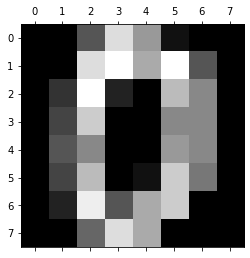

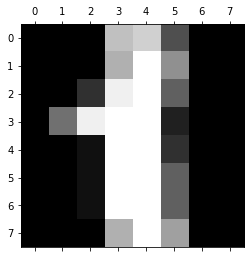

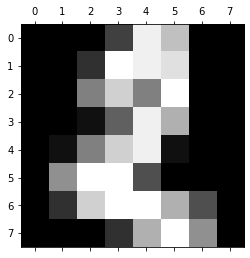

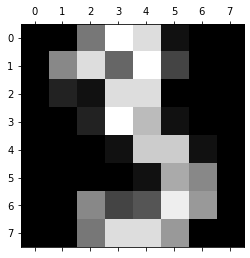

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [67]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We thus have the digits 0-9 in the dataset.

Now let's get the digits features and the target.

In [68]:
print("digits feature data ::", digits['data'])

digits feature data :: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [69]:
print("digits target ::", digits['target'])

digits target :: [0 1 2 ... 8 9 8]


In [70]:
# Converting data to DataFrame
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [71]:
# Adding the target column to the dataframe
df['target'] = digits.target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# **1. Split the data into train and test sets with ratio 80:20**

In [75]:
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3,random_state=42)

In [76]:
X = df.drop(['target'], axis = 'columns')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [77]:
y = df.target
y

0    0
1    1
2    2
3    3
4    4
    ..
9    9
0    0
8    8
9    9
8    8
Name: target, Length: 1797, dtype: int64

## **Splitting the Data**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [79]:
print(len(X_train))
print(len(X_test))

1437
360


# **2. Determine the default kernel that is used while creating SVM.**

In [80]:
model = SVC()
model.fit(X_train, y_train)


SVC()

In [81]:
model.score(X_train,y_train)

0.9965205288796103

In [82]:
model.score(X_test,y_test)

0.9861111111111112

It's has 99% score of SVM

# **3. Create an SVM model with RBF kernel. Train it and find out its score.**

In [83]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [84]:
model.score(X_train,y_train)

0.9965205288796103

It gives us a 99% score on the RBF kernel of the trained model.

# **4. Create an SVM model with a Linear kernel. Train it and find out its score.**

In [85]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [86]:
model.score(X_train,y_train)

1.0

# **5. Compare the two and see which one performs better.**

In [87]:
digits = load_digits() 
X = digits.data[:,:2] # we only take the first two features.
y = digits.target
C=1.0 #SVM regularization parameter

# SVC with linear kernel
svc = svm.SVC(kernel='linear',C=C).fit(X,y)

#LinearSVC(linear kernel)
lin_svc =svm.LinearSVC(C=C).fit(X,y)

#SVC with RBF kernel
rbf_svc =svm.SVC(kernel ='rbf',C=C).fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [88]:
svc.score(X,y)

0.14858096828046743

In [89]:
lin_svc.score(X,y)

0.13912075681691707

In [90]:
rbf_svc.score(X,y)

0.1530328324986088

rbf_svc has better performance it give as 15% score. 

In [91]:
import numpy as np
import pickle
from sklearn import preprocessing

In [92]:
predictions  = model.predict(X_test)
print(predictions)

[4 0 1 1 9 6 0 3 6 0 4 4 3 8 1 9 8 9 6 2 4 1 7 1 1 9 3 3 3 5 0 3 0 7 2 8 1
 5 0 6 8 4 3 0 4 1 5 7 0 2 1 6 0 8 0 9 2 5 9 9 6 4 7 1 5 8 9 0 6 0 5 7 0 5
 3 0 1 6 7 1 2 3 7 0 7 1 9 6 7 4 4 2 6 4 2 3 1 3 1 3 7 5 8 5 0 9 5 7 7 8 7
 9 8 1 3 1 6 4 0 2 2 3 0 8 1 6 6 2 3 0 0 5 1 9 4 0 8 4 2 6 6 4 0 5 2 0 2 7
 0 6 8 9 3 6 7 3 7 0 0 9 2 7 4 9 4 7 0 0 7 1 1 1 7 2 9 2 1 0 4 2 3 6 1 9 0
 8 3 2 9 8 0 8 4 5 6 0 9 0 6 0 2 3 9 1 9 5 7 3 0 5 9 8 5 5 5 5 5 5 2 0 5 8
 4 8 9 8 9 8 3 4 6 9 7 7 5 6 0 4 3 7 5 0 8 5 5 7 0 8 1 7 0 3 6 9 1 8 5 9 4
 4 3 6 0 4 4 6 9 6 1 6 1 2 6 2 8 4 6 3 0 2 5 4 5 9 7 0 2 1 2 8 1 8 8 2 9 9
 7 1 6 4 4 3 7 7 5 4 1 5 0 8 3 5 0 8 7 4 6 9 8 4 2 7 2 7 4 9 3 6 1 6 5 5 2
 1 5 6 2 9 1 4 4 6 5 5 1 5 0 3 4 2 1 0 8 8 7 2 1 9 1 9]


In [93]:
percentage = model.score(X_test,y_test)
percentage

0.9805555555555555

In [94]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage * 100}%")

Confusion Matrix
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  1]
 [ 0  4  0  0  0  0  0  0 31  0]
 [ 0  0  0  1  0  0  0  0  0 35]]
Test Set: 360
Accuracy = 98.05555555555556%


The accuracy score 98%

# **6. Try using diffferent values of c and gamma to improve model performance.**


## values of c to improve model performance

In [95]:
model = SVC(C=10)
model.fit(X_train, y_train)

SVC(C=10)

In [96]:
model.score(X_train,y_train)

1.0

## values of gamma =10 to improve model performance

In [97]:
model = SVC(gamma=10)
model.fit(X_train, y_train)

SVC(gamma=10)

In [98]:
model.score(X_train,y_train)

1.0

Let's difference if we have gamma, different gamma values like 0, 10 or 100

In [99]:
from mpmath import gamma

In [100]:
svc_gamma =svm.SVC(gamma=10,C=10).fit(X,y)

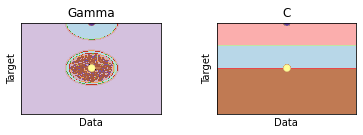

In [101]:
import numpy as np

h = .02 # step size in the mesh

# Create a mesh to plot in
x_min ,x_max = X[:,0].min()-1,X[:,0].max() + 1
y_min, y_max = X[:,1].min()-1,X[:,0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

#title for the plots
titles =['Gamma','C']

for i, clf in enumerate((svc_gamma,svc)):
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4,hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

  #put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z, cmap=plt.cm.Paired, alpha =0.8)

  #plot also the training points
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Data')
  plt.ylabel('Target')
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()
